In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\MEW\Downloads\sms Spam\spam.csv")

In [3]:
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


* Here we can see in Unnamed : 2, Unnamed :3 and Unnamed :4 50,12 and 6 values are not NAN so, we can delete them or we can keep values.

In [6]:
# Replace NaN with 'Unknown'
df = data.fillna('Unknown')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",Unknown,Unknown,Unknown
1,ham,Ok lar... Joking wif u oni...,Unknown,Unknown,Unknown
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Unknown,Unknown,Unknown
3,ham,U dun say so early hor... U c already then say...,Unknown,Unknown,Unknown
4,ham,"Nah I don't think he goes to usf, he lives aro...",Unknown,Unknown,Unknown


Text(0.5, 1.0, 'Count of SMS by Category')

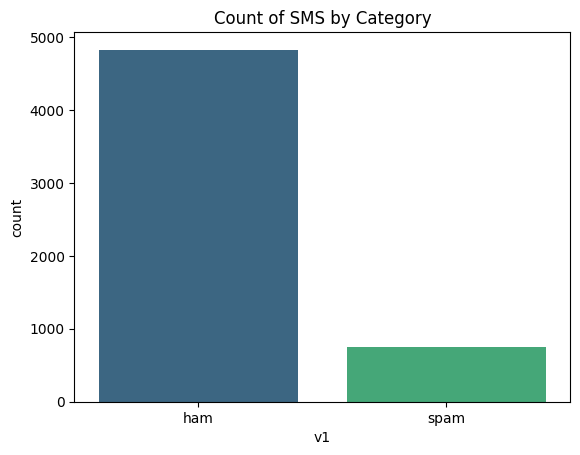

In [8]:
import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

sns.countplot(x='v1',data=df, palette='viridis') # Create the count plot
plt.title('Count of SMS by Category')

In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Define the vectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['v2'])

# Encode target variable
y = df['v1'].apply(lambda x: 1 if x == 'ham' else 0)  # Assuming 'spam' and 'not spam' labels

In [12]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: v1, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       150
           1       0.97      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_clf.predict(X_test)

# Accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print("AdaBoost Accuracy:", accuracy_ada)
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       150
           1       0.97      0.99      0.98       965

    accuracy                           0.97      1115
   macro avg       0.96      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [17]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
# Make predictions
y_pred_model = model.predict(X_test)

# Evaluate model
print(f"Accuracy Naive Bayes:: {accuracy_score(y_test, y_pred_model)}")
print(classification_report(y_test, y_pred_model))

Accuracy Naive Bayes:: 0.97847533632287
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       150
           1       0.99      0.99      0.99       965

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [19]:
print("Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

print('--------------------------------------------------------------------------------------------------------------------')

print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

print('--------------------------------------------------------------------------------------------------------------------')

print("AdaBoost Accuracy:", accuracy_ada)
print(classification_report(y_test, y_pred_ada))

print('--------------------------------------------------------------------------------------------------------------------')

print(f"Accuracy Naive Bayes:: {accuracy_score(y_test, y_pred_model)}")
print(classification_report(y_test, y_pred_model))

Logistic Regression Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------------------------------------------------------------------------
Random Forest Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       150
           1       0.97      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

--------------------------------------------------------------------------------------------------------------------
AdaBoost Accuracy: 0

**Logistic Regression:** Best overall with 0.98 accuracy, strong precision/recall for both classes, especially Class 1.

**Random Forest:** 0.97 accuracy, excellent for Class 1, but lower recall for Class 0.

**AdaBoost:** 0.97 accuracy, good for Class 1, lower recall for Class 0.

**Naive Bayes:** 0.98 accuracy, high recall for both classes, especially good balance.

**Best Recall for Class 0:** Naive Bayes and Logistic Regression.

**Best F1-Score and Precision for Class 1:** Logistic Regression and Naive Bayes.

**Accuracy:** All models are close, but Logistic Regression and Naive Bayes perform best overall.

Therefore we can say **Logistic Regression and Naive Bayes** might be the most balanced in terms of accuracy and precision-recall trade-offs for both classes, but **Random Forest and AdaBoost** still offer competitive performance.

In [22]:
def predict_message(message):
    # Transform the input message and ensure it is in the correct shape
    message_vectorized = vectorizer.transform([message])  # This is already a 2D array with shape (1, n_features)
    prediction = model.predict(message_vectorized)  # Call predict on the Naive Bayes model
    return prediction[0]

In [21]:
# Model test
test_message = input("Enter an SMS message to classify: ")
result = predict_message(test_message)
print(f"The message is classified as: {result}")
print("Note: 1 = ham and 0 = spam")

Enter an SMS message to classify:  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...	


The message is classified as: 0
Note: 1 = ham and 0 = spam


In [32]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,Unknown,Unknown,Unknown
2327,spam,URGENT! Your mobile number *************** WON...,Unknown,Unknown,Unknown
251,ham,"Wen ur lovable bcums angry wid u, dnt take it ...",Unknown,Unknown,Unknown
94,ham,Havent planning to buy later. I check already ...,Unknown,Unknown,Unknown
2265,ham,I cant pick the phone right now. Pls send a me...,Unknown,Unknown,Unknown
4596,ham,Full heat pa:-) i have applyed oil pa.,Unknown,Unknown,Unknown
1660,ham,No just send to you. Bec you in temple na.,Unknown,Unknown,Unknown


In [45]:
print(type(model))  # This should show the type of your model, e.g., <class 'sklearn.linear_model._base.LinearRegression'>


<class 'sklearn.naive_bayes.MultinomialNB'>


In [46]:
print(type(ada_clf))

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
